In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('./digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


# As we can see we have 'Label' where we littery store the number so we will one_hot it!
Then we have the rest of the pixels image in its column from 0 to 783 so 784 pixels

In [6]:
y_train = data['label']

In [7]:
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [8]:
y_train.shape

(42000,)

In [9]:
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [10]:
y_train.describe()

count    42000.000000
mean         4.456643
std          2.887730
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: label, dtype: float64

In [11]:
x_train = data.drop('label',axis=1)

We have 0 min and 9 max so 10 numbers!

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.1)

In [13]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [14]:
y_cat_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [15]:
y_cat_train.shape

(37800, 10)

In [16]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
10773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2051,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
x_train.shape

(37800, 784)

In [18]:
x_train.loc[[1]]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
x_train.loc[[1][0]].shape

(784,)

In [20]:
test_image = np.asarray(x_train.loc[[1][0]])

In [21]:
test_image.shape

(784,)

In [22]:
test_image = test_image.reshape(28,28)

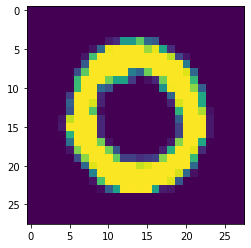

In [23]:
plt.imshow(test_image)

# Ok now we will have to turn pixels on each row to a image and store it to an array

In [24]:
data_images_train = []
data_images_test = []

In [25]:
x_train.shape[0]

37800

In [26]:
x_test.shape[0]

4200

for ids,row in x_test.iterrows():
    print(ids)

In [59]:
for id, row in x_train.iterrows():
    store = np.asarray(x_train.loc[[id][0]])
    store = store.reshape(28,28)
    data_images_train.append(store)
    
for id, row in x_test.iterrows():
    store = np.asarray(x_test.loc[[id][0]])
    store = store.reshape(28,28)
    data_images_test.append(store)

In [60]:
data_images_train = np.asarray(data_images_train)
data_images_test = np.asarray(data_images_test)

In [61]:
data_images_train.shape

(37800, 28, 28)

In [62]:
data_images_test.shape

(4200, 28, 28)

# Ok now we haev the data in numpy

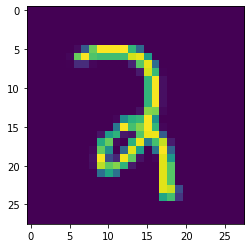

In [63]:
plt.imshow(data_images_train[20])

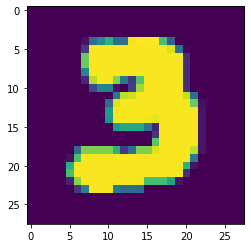

In [64]:
plt.imshow(data_images_test[435])

We have altough to reshape to have channel dimensions!

In [65]:
x_train = data_images_train.reshape(37800,28,28,1)
x_test = data_images_test.reshape(4200,28,28,1)

In [66]:
x_train.shape

(37800, 28, 28, 1)

In [67]:
x_test.shape

(4200, 28, 28, 1)

In [94]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [69]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


Ok good but now we don't have dataset to do evaluation so lets first brake the dataset in train and test and then fit!

In [71]:
model.fit(x_train,y_cat_train,epochs=10)

Epoch 1/10
1182/1182 [==============================] - 18s 16ms/step - loss: 1.8332 - accuracy: 0.9312
Epoch 2/10
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0843 - accuracy: 0.9788
Epoch 3/10
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0521 - accuracy: 0.9872
Epoch 4/10
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0400 - accuracy: 0.9909
Epoch 5/10
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0286 - accuracy: 0.9937
Epoch 6/10
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0228 - accuracy: 0.9958
Epoch 7/10
1182/1182 [==============================] - 18s 16ms/step - loss: 0.0178 - accuracy: 0.9969
Epoch 8/10
1182/1182 [==============================] - 19s 16ms/step - loss: 0.0093 - accuracy: 0.9981
Epoch 9/10
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0075 - accuracy: 0.9984
Epoch 10/10
1182/1182 [==============================] - 18s 15m

In [72]:
model.metrics_names

['loss', 'accuracy']

In [73]:
model.evaluate(x_test,y_cat_test)

132/132 [==============================] - 1s 5ms/step - loss: 0.3094 - accuracy: 0.9848


[0.3094151020050049, 0.9847618937492371]

In [75]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [76]:
predictions[1]

0

In [78]:
y_test

2489     4
24118    0
24934    2
30633    2
31745    3
        ..
2643     9
8973     7
14775    6
33029    9
12065    0
Name: label, Length: 4200, dtype: int64

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       398
           1       0.99      1.00      0.99       472
           2       0.97      0.99      0.98       401
           3       1.00      0.95      0.97       426
           4       0.98      0.98      0.98       392
           5       0.98      0.99      0.98       369
           6       1.00      1.00      1.00       417
           7       0.98      0.99      0.98       453
           8       0.99      0.97      0.98       422
           9       0.98      0.98      0.98       450

    accuracy                           0.98      4200
   macro avg       0.98      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200



## As we can se we have great scores, now lets train on the entire dataset so we will have better chances at thetest_csv 

In [81]:
data = pd.read_csv('./digit-recognizer/train.csv')

In [82]:
y_train = data['label']
x_train = data.drop('label',axis=1)
y_cat_train = to_categorical(y_train,10)

In [84]:
data_images = []
for i in range(x_train.shape[0]):
    store = np.asarray(x_train.loc[[i][0]])
    store = store.reshape(28,28)
    data_images.append(store)

In [85]:
data_images = np.asarray(data_images)

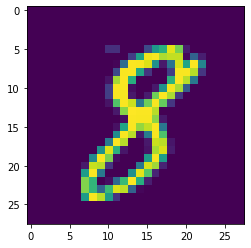

In [86]:
plt.imshow(data_images[20])

In [98]:
x_train = data_images.reshape(42000,28,28,1)

In [102]:
model2 = Sequential()

# CONVOLUTIONAL LAYER
model2.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model2.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
model2.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model2.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model2.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model2.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model2.add(Dense(10, activation='softmax'))


model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [103]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 64)          32832     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

In [104]:
model2.fit(x_train,y_cat_train,epochs=10)

Epoch 1/10
1313/1313 [==============================] - 28s 21ms/step - loss: 0.5122 - accuracy: 0.9317
Epoch 2/10
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0917 - accuracy: 0.9765
Epoch 3/10
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0812 - accuracy: 0.9808
Epoch 4/10
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0692 - accuracy: 0.9851
Epoch 5/10
1313/1313 [==============================] - 28s 22ms/step - loss: 0.0636 - accuracy: 0.9864
Epoch 6/10
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0638 - accuracy: 0.9869
Epoch 7/10
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0615 - accuracy: 0.9876
Epoch 8/10
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0687 - accuracy: 0.9882
Epoch 9/10
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0637 - accuracy: 0.9885
Epoch 10/10
1313/1313 [==============================] - 24s 18m

## Ok now we should import test csv

In [107]:
test_data = pd.read_csv('./digit-recognizer/test.csv')

In [109]:
test_data.shape[0]

28000

In [110]:
data_images = []
for i in range(test_data.shape[0]):
    store = np.asarray(test_data.loc[[i][0]])
    store = store.reshape(28,28)
    data_images.append(store)

In [112]:
data_images = np.asarray(data_images)
test_images = data_images.reshape(28000,28,28,1)

In [113]:
test_predictions = model2.predict_classes(test_images)

In [114]:
test_predictions[1]

0

In [115]:
test_predictions[5]

7

In [116]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
export = []
for i in range(test_data.shape[0]):
    export.append([i+1,test_predictions[i]])

In [128]:
df = pd.DataFrame(export, columns=['ImageId', 'Label'])

In [129]:
df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


## Successfully created dataframe for submission

In [130]:
df.to_csv(r'./Submission.csv')

In [131]:
df.shape

(28000, 2)